#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 7 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import torch 
import torch.nn as nn
from torch.autograd import Variable
from sklearn.utils import shuffle
from torchsummary import summary
from math import tanh
from math import exp
from random import random
from sklearn.preprocessing import StandardScaler
import time

#**Question-1**

###In this exercise, you need to predict the life of Abalone - a kind of shellfish, based on a number of characteristics (sex, length, diameter, height, weights in different forms, etc.). Model it as a classification problem to predict the class (based on the number of rings).

###You need to use the PyTorch library to create a neural network with the following specification, split the data and find out the accuracy on the test set after training:

###Decide on the hidden layer size on your own. Use sigmoid activation for the output layer and tanh for the hidden layers. The ‘+’ Symbol represents the addition of the outputs of the 2 branches.

##Input the dataset

In [ ]:
abaloneDataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-7/abalone.data", header=None, names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
abaloneDataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
abaloneDataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
abaloneDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abaloneDataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
l = abaloneDataset['Rings'].tolist()
t = []
for i in l:
    if(i>=0 and i <=8):
        t.append(0)
    elif(i>=9 and i <=10):
        t.append(1)
    else:
        t.append(2)

In [ ]:
abaloneDataset.drop(['Rings'], axis = 1)
abaloneDataset['Rings'] = t

In [ ]:
abaloneDataset.shape

(4177, 9)

In [ ]:
Label_Encode = LabelEncoder()
abaloneDataset['Sex'] = Label_Encode.fit_transform(abaloneDataset['Sex'])

In [ ]:
target = 'Rings'
X = abaloneDataset.iloc[:, abaloneDataset.columns != target]
y = abaloneDataset.iloc[:, abaloneDataset.columns.get_loc(target)]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify = y)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 3029 to 608
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2923 non-null   int64  
 1   Length          2923 non-null   float64
 2   Diameter        2923 non-null   float64
 3   Height          2923 non-null   float64
 4   Whole weight    2923 non-null   float64
 5   Shucked weight  2923 non-null   float64
 6   Viscera weight  2923 non-null   float64
 7   Shell weight    2923 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 205.5 KB


In [ ]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

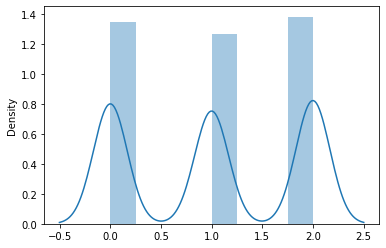

In [ ]:
sns.distplot(y_train)

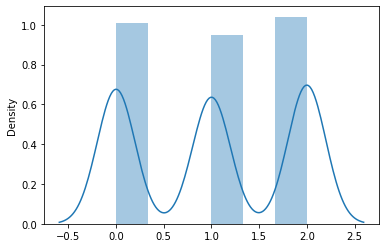

In [ ]:
sns.distplot(y_test)

##MLP

In [ ]:
#Define training hyperprameters.
batch_size = 35
num_epochs = 500
learning_rate = 0.001
size_hidden_1 = 25
size_hidden_2 = 25
num_classes = 3

#Calculate some other hyperparameters based on data.  
batch_no = len(x_train) // batch_size  #batches
cols = x_train.shape[1] #Number of columns in input matrix

In [ ]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, size_hidden_2, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_1 = torch.nn.Tanh() # activation layer

        self.hidden_layer_2 = torch.nn.Linear(num_inputs, size_hidden_2)   # hidden layer
        self.activation_2 = torch.nn.Tanh() # activation layer
        
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        h1 = self.activation_1(self.hidden_layer_1(x))      # activation function for hidden layer
        h2 = self.activation_2(self.hidden_layer_2(x))      # activation function for hidden layer
        out = self.output_act(h1 + h2)                    # output
        return out

net = Net(cols, size_hidden_1, size_hidden_2, num_classes)
summary(net, (1, 8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 25]             225
              Tanh-2                [-1, 1, 25]               0
            Linear-3                [-1, 1, 25]             225
              Tanh-4                [-1, 1, 25]               0
           Sigmoid-5                [-1, 1, 25]               0
Total params: 450
Trainable params: 450
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.CrossEntropyLoss()  

In [ ]:
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
for epoch in range(num_epochs):
    x_train, y_train = shuffle(x_train, y_train)
    train_acc = 0.0
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(x_train[start:end]))
        labels = Variable(torch.LongTensor(y_train[start:end]))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_acc += acc
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
    running_loss = 0.0

Epoch: 1 | Loss: 3.2223 | Train Accuracy: 0.00
Epoch: 2 | Loss: 3.2141 | Train Accuracy: 0.00
Epoch: 3 | Loss: 3.2060 | Train Accuracy: 0.00
Epoch: 4 | Loss: 3.1980 | Train Accuracy: 0.00
Epoch: 5 | Loss: 3.1897 | Train Accuracy: 0.00
Epoch: 6 | Loss: 3.1819 | Train Accuracy: 0.00
Epoch: 7 | Loss: 3.1735 | Train Accuracy: 0.00
Epoch: 8 | Loss: 3.1658 | Train Accuracy: 0.31
Epoch: 9 | Loss: 3.1584 | Train Accuracy: 1.00
Epoch: 10 | Loss: 3.1505 | Train Accuracy: 1.96
Epoch: 11 | Loss: 3.1430 | Train Accuracy: 2.38
Epoch: 12 | Loss: 3.1356 | Train Accuracy: 2.75
Epoch: 13 | Loss: 3.1282 | Train Accuracy: 3.06
Epoch: 14 | Loss: 3.1211 | Train Accuracy: 3.30
Epoch: 15 | Loss: 3.1143 | Train Accuracy: 3.58
Epoch: 16 | Loss: 3.1073 | Train Accuracy: 7.33
Epoch: 17 | Loss: 3.1009 | Train Accuracy: 13.63
Epoch: 18 | Loss: 3.0943 | Train Accuracy: 18.97
Epoch: 19 | Loss: 3.0880 | Train Accuracy: 24.34
Epoch: 20 | Loss: 3.0816 | Train Accuracy: 29.88
Epoch: 21 | Loss: 3.0757 | Train Accuracy: 32

#**Question-2**

###You have been given a dataset here. It consists of different characteristics of dry beans (consider only: area, perimeter, axes lengths, eccentricity, roundness, aspect ratio, and convex area - 7 features). You need to perform classification into different varieties (Cali, Bombay, Barbunya, etc.). For this classification, you need to use a multi-layer perceptron.

##**a.** Preprocess & visualize the data. Create train, val, and test splits but take into consideration the class distribution
####(Hint: Look up stratified splits).

In [ ]:
dryBeanDataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-7/DryBeanDataset/Dry_Bean_Dataset.xlsx')
dryBeanDataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
dryBeanDataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

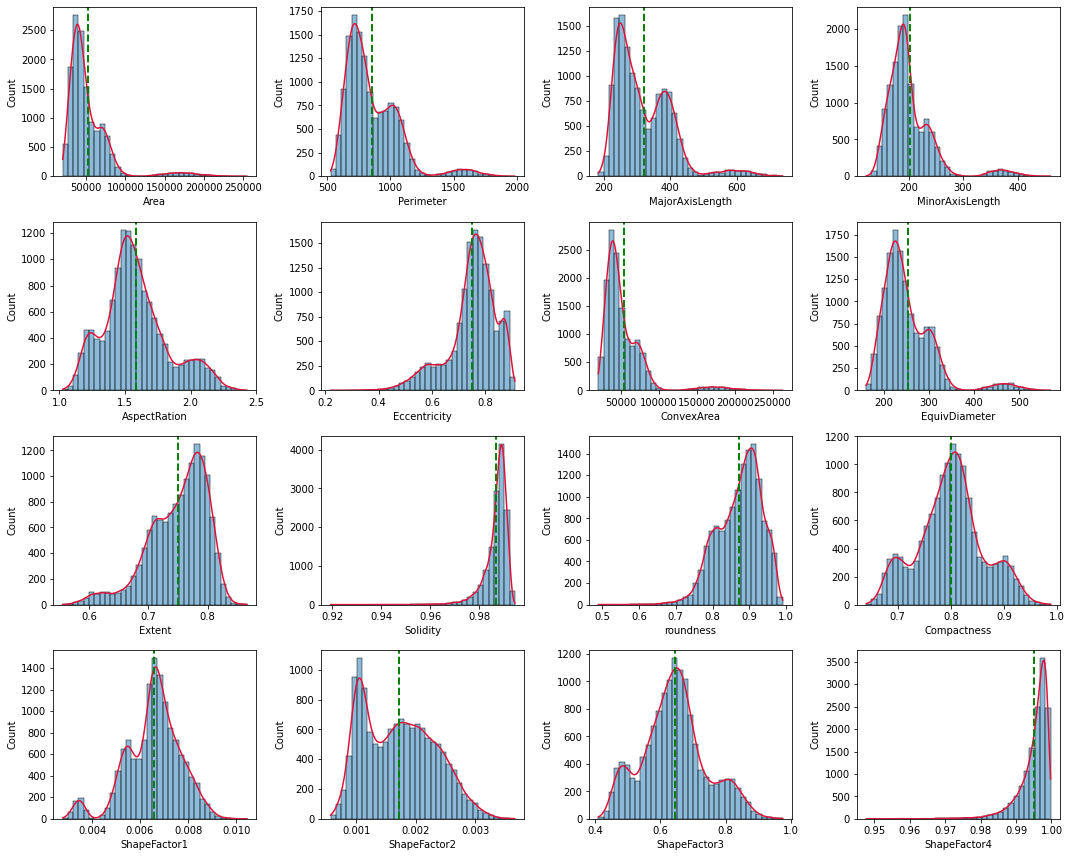

In [ ]:
cols = dryBeanDataset.drop(columns=['Class']).columns

figure, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(cols, ax.flatten()):
    g=sns.histplot(dryBeanDataset[variable], bins=35, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=dryBeanDataset[variable].mean(), color='g', label='Mean', linestyle='--', linewidth=1.95)
plt.tight_layout()

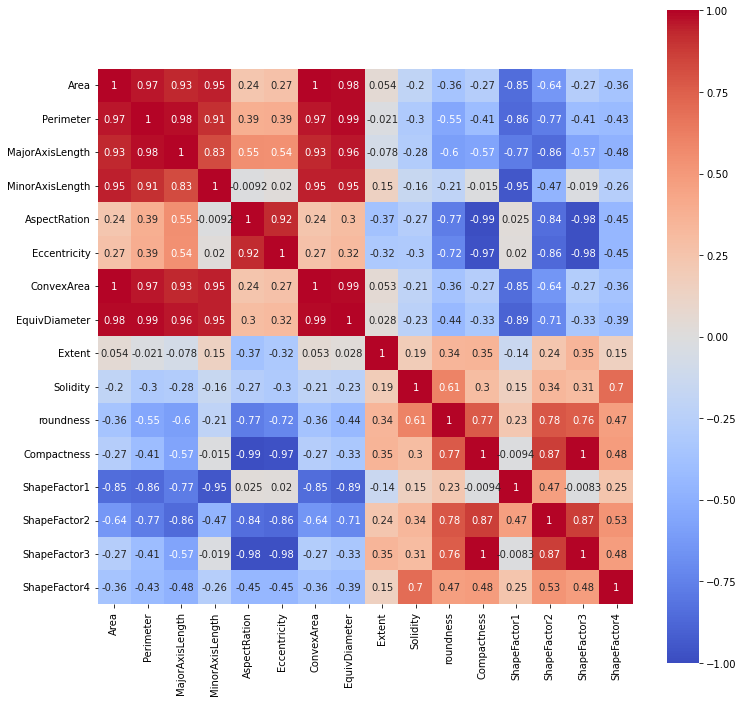

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dryBeanDataset.corr("pearson"), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

In [ ]:
dryBeanDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
Label_Encode = LabelEncoder()
dryBeanDataset['Class'] = Label_Encode.fit_transform(dryBeanDataset['Class']) + 1

In [ ]:
scaler = StandardScaler()
for i in dryBeanDataset.columns:
    # Since Class is target function.
    if(i == 'Class'):
        continue
    else:
        dryBeanDataset[[i]] = scaler.fit_transform(dryBeanDataset[[i]])
dryBeanDataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,6
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,6
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,6
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,6
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261425,0.055630,-0.006086,0.760813,4
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110384,0.285117,0.328393,0.722659,4
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104269,0.289204,0.336328,0.390251,4
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141906,0.228375,0.248973,0.036440,4


In [ ]:
dryBeanDataset['Class'].unique()

array([6, 1, 2, 3, 5, 7, 4])

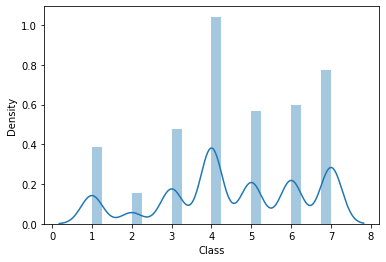

In [ ]:
sns.distplot(dryBeanDataset['Class'])

In [ ]:
dryBeanDataset.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,13611.000000
mean,-6.604363e-16,-1.216596e-15,8.703803e-16,4.103445e-16,-5.324805e-16,-7.462051e-16,-9.092597e-16,-3.963800e-16,-1.876922e-15,-2.301027e-14,2.380687e-16,-5.287263e-16,-8.734513e-16,7.887938e-16,-5.410043e-16,1.991064e-14,4.532657
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.828709
min,-1.112719e+00,-1.542583e+00,-1.593407e+00,-1.773645e+00,-2.263655e+00,-5.782098e+00,-1.111184e+00,-1.551678e+00,-3.960880e+00,-1.456945e+01,-6.446210e+00,-2.581167e+00,-3.356153e+00,-1.932991e+00,-2.356255e+00,-1.085036e+01,1.000000
25%,-5.702102e-01,-7.082260e-01,-7.799910e-01,-5.875797e-01,-6.118921e-01,-3.800848e-01,-5.727750e-01,-6.420997e-01,-6.335853e-01,-3.159613e-01,-6.919874e-01,-6.059668e-01,-5.884012e-01,-9.439025e-01,-6.286495e-01,-3.115721e-01,3.000000
50%,-2.863377e-01,-2.816033e-01,-2.714228e-01,-2.187975e-01,-1.302079e-01,1.472404e-01,-2.885152e-01,-2.471687e-01,2.063003e-01,2.446575e-01,1.659247e-01,2.289701e-02,7.231301e-02,-3.762062e-02,-1.561590e-02,3.029170e-01,4.000000
75%,2.824987e-01,5.690149e-01,6.576317e-01,3.282530e-01,5.021578e-01,6.475228e-01,2.863522e-01,4.458347e-01,7.562196e-01,6.159095e-01,7.323368e-01,5.575363e-01,6.275166e-01,7.624716e-01,5.294956e-01,6.456801e-01,6.000000
max,6.874044e+00,5.273833e+00,4.886372e+00,5.735751e+00,3.434007e+00,1.744901e+00,7.036141e+00,5.345339e+00,2.372678e+00,1.616807e+00,1.972582e+00,3.037363e+00,3.446551e+00,3.270983e+00,3.345475e+00,1.069377e+00,7.000000


In [ ]:
target = 'Class'
X = dryBeanDataset.iloc[:, dryBeanDataset.columns != target]
y = dryBeanDataset.iloc[:, dryBeanDataset.columns.get_loc(target)]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True, stratify = y)

In [ ]:
y_train.value_counts()

4    2482
7    1845
6    1419
5    1350
3    1141
1     925
2     365
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

4    1064
7     791
6     608
5     578
3     489
1     397
2     157
Name: Class, dtype: int64

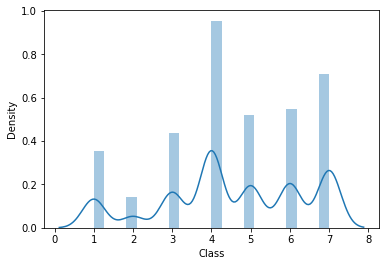

In [ ]:
sns.distplot(y_train)

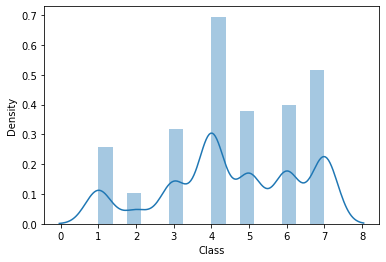

In [ ]:
sns.distplot(y_test)

In [ ]:
x_train = x_train.values.tolist()
x_test = x_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

##**b.** Implement a multi-layer perceptron from scratch. This would include the following


###**0.** Initialize network.

In [ ]:
def initNetwork(inputs, hidden_layers, outputs):
	network = []
	# Initializing the weights with random values.
	# Hidden Layers
	hidden_layer = [{'wts':[random() for i in range(inputs + 1)]} for i in range(hidden_layers)]
	# Output Layer.
	output_layer = [{'wts':[random() for i in range(hidden_layers + 1)]} for i in range(outputs)]
	network.append(hidden_layer)
	network.append(output_layer)
	return network

In [ ]:
def productOfWeightAndInputs(wts, inputs):
	productOfWeightAndInputs = wts[-1]
	for itr in range(len(wts)-1):
		productOfWeightAndInputs += float(wts[itr]) * float(inputs[itr])
	return productOfWeightAndInputs

###**i.** Write activation functions.

In [ ]:
# Activation Functions

def Sigmoid(productOfWeightAndInputs):
	return 1.0 / (1.0 + exp((-1)*productOfWeightAndInputs))
 
def Tanh(productOfWeightAndInputs):
    return tanh(productOfWeightAndInputs)

def LeakyReLu():
    return max(0.1*productOfWeightAndInputs, productOfWeightAndInputs)

def ReLu(productOfWeightAndInputs):
    return max(0, productOfWeightAndInputs)

# Their Derivatives

def Sigmoid_d(output):
	return output * (1.0 - output)
 
def ReLu_d(output):
    if output <= 0:
        return 0
    else:
        return 1

def LeakyReLu_d(output):
    if output <= 0:
        return 0.1
    else:
        return 1

def Tanh_d(output):
    return 1-((output)**2)

###**ii.** Forward propagate the input.

In [ ]:
def forwardPropagate(network, row, activation):
    inputs = row
    for layer in network:
        newInputs = []
        for neuron in layer:
            prod = productOfWeightAndInputs(neuron['wts'], inputs)
            if activation == 'Sigmoid':
                neuron['output'] = Sigmoid(prod)
            elif activation == 'ReLu':
                neuron['output'] = ReLu(prod)
            elif activation == 'Tanh':
                neuron['output'] = Tanh(prod)
            elif activation == 'LeakyReLu':
                neuron['output'] = LeakyReLu(prod)
            else:
                print("Invalid Activation Function!!")
            newInputs.append(neuron['output'])
        inputs = newInputs
    return inputs

###**iii.** Backward propagate the error.

In [ ]:
def backwardPropagateTheError(network, expected, activation):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []
        if(i==len(network)-1):
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output']) 
        else:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i+1]:
                    error += (neuron['wts'][j] * neuron['delta'])
                errors.append(error)            

        for j in range(len(layer)):
            neuron = layer[j]
            if activation == 'Sigmoid':
                neuron['delta'] = errors[j] * Sigmoid_d(neuron['output'])
            elif activation == 'ReLu':
                neuron['delta'] = errors[j] * ReLu_d(neuron['output'])
            elif activation == 'Tanh':
                neuron['delta'] = errors[j] * Tanh_d(neuron['output'])
            elif activation == 'LeakyReLu':
                neuron['delta'] = errors[j] * LeakyReLu_d(neuron['output'])
            else:
                print("Invalid Activation Function!!")

###**iv.** Train the network using stochastic gradient descent.

In [ ]:
def updateweights(network, row, learning_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		# print(inputs)
		if(i != 0):
			inputs = [neuron['output'] for neuron in network[i - 1]]
			# print(inputs)
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['wts'][j] += learning_rate * neuron['delta'] * inputs[j]
			neuron['wts'][-1] += learning_rate * neuron['delta']

In [ ]:
def trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation):
    loss = []
    for epoch in range(epochs):
        error = 0
        for row in training:
            outputs = forwardPropagate(network, row, activation)
            for j in range(len(outputs)):
                if(outputs[j]==max(outputs)):
                    outputs[j] = 1
                else:
                    outputs[j] = 0
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])-1] = 1
            error += sum([(expected[k]-outputs[k])**2 for k in range(0, len(expected))])
            backwardPropagateTheError(network, expected, activation)
            updateweights(network, row, learning_rate)
        loss.append(error)
    pred = []
    for row in testing:
        outputs = forwardPropagate(network, row, activation)
        pred.append(outputs.index(max(outputs))+1)
    return min(loss)/len(training), pred

###**v.** Predict the output for a given test sample and compute the accuracy.

In [ ]:
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minimumLoss_ReLu, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_ReLu = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_ReLu)
print("Loss:", minimumLoss_ReLu)

Accuracy:  81.04799216454457
Loss: 0.3942479269444736


##**c.** Now experiment with different activation functions (at least 3 & to be written from scratch) and comment (in the report) on how the accuracy varies. Create plots to support your arguments.

####ReLu

In [ ]:
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minimumLoss_ReLu, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_ReLu = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_ReLu)
print("Loss:", minimumLoss_ReLu)

Accuracy:  83.17825661116552
Loss: 0.33063923585598826


####Sigmoid

In [ ]:
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'Sigmoid'
minimumLoss_Sigmoid, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_Sigmoid = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_Sigmoid)
print("Loss:", minimumLoss_Sigmoid)

Accuracy:  67.85014691478942
Loss: 0.6344074734963787


####Tanh

In [ ]:
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'Tanh'
minimumLoss_Tanh, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_Tanh = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_Tanh)
print("Loss:", minimumLoss_Tanh)

Accuracy:  52.42409402546523
Loss: 0.5894825233546762


####Plot

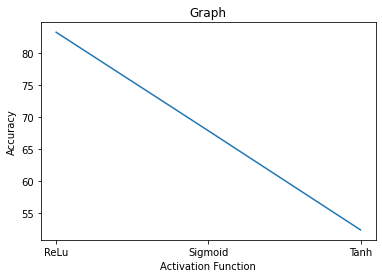

In [ ]:
Dict = {}
Dict['ReLu'] = accuracy_ReLu
Dict['Sigmoid'] = accuracy_Sigmoid
Dict['Tanh'] = accuracy_Tanh
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.show()

##**d.** Experiment with different weight initialization: Random, Zero & Constant. Create plots to support your arguments.

####Random

In [ ]:
def initNetwork_random(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'wts':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	output_layer = [{'wts':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(hidden_layer)
	network.append(output_layer)
	return network

In [ ]:
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork_random(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_r, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_r = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_r)
print("Loss:", minLoss_r)

Accuracy:  81.53770812928501
Loss: 0.3856408103285399


####Zero

In [ ]:
def initNetwork_zero(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'wts':[0 for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	output_layer = [{'wts':[0 for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(hidden_layer)
	network.append(output_layer)
	return network

In [ ]:
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork_zero(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_z, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_z = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_z)
print("Loss:", minLoss_z)

Accuracy:  9.720861900097944
Loss: 1.8058150519575942


####Constant

In [ ]:
def initNetwork_constant(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'wts':[1 for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	output_layer = [{'wts':[1 for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(hidden_layer)
	network.append(output_layer)
	return network

In [ ]:
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork_constant(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_c, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_c = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_c)
print("Loss:", minLoss_c)

Accuracy:  29.505386875612142
Loss: 1.4084181799097302


####Plot

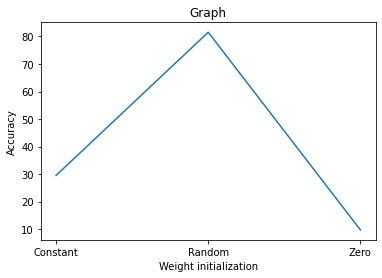

In [ ]:
Dict = {}
Dict['Random'] = accuracy_r
Dict['Zero'] = accuracy_z
Dict['Constant'] = accuracy_c
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Weight initialization")
plt.ylabel("Accuracy")
plt.show()

##**e.** Change the number of hidden nodes and comment upon the training and accuracy. Create plots to support your arguments.

####1 Hidden Node

In [ ]:
start_time = time.time()
inputs = X.shape[1]
hidden_layers = 1
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_r_h1, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_r_h1 = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_r_h1)
print("Loss:", minLoss_r_h1)
print("--- Training Time: %s seconds ---" % (time.time() - start_time))

Accuracy:  58.521057786483844
Loss: 0.8432874986879395
--- Training Time: 43.860706090927124 seconds ---


####2 Hidden Node

In [ ]:
start_time = time.time()
inputs = X.shape[1]
hidden_layers = 2
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_r_h2, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_r_h2 = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_r_h2)
print("Loss:", minLoss_r_h2)
print("--- Training Time: %s seconds ---" % (time.time() - start_time))

Accuracy:  85.06366307541626
Loss: 0.2922221055946258
--- Training Time: 59.103824853897095 seconds ---


####3 Hidden Node

In [ ]:
start_time = time.time()
inputs = X.shape[1]
hidden_layers = 3
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_r_h3, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_r_h3 = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_r_h3)
print("Loss:", minLoss_r_h3)
print("--- Training Time: %s seconds ---" % (time.time() - start_time))

Accuracy:  90.59745347698335
Loss: 0.19061614359189671
--- Training Time: 72.98189234733582 seconds ---


####4 Hidden Node

In [ ]:
start_time = time.time()
inputs = X.shape[1]
hidden_layers = 4
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_r_h4, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_r_h4 = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_r_h4)
print("Loss:", minLoss_r_h4)
print("--- Training Time: %s seconds ---" % (time.time() - start_time))

Accuracy:  91.23408423114594
Loss: 0.1719324026451139
--- Training Time: 89.13736462593079 seconds ---


####5 Hidden Node

In [ ]:
start_time = time.time()
inputs = X.shape[1]
hidden_layers = 5
outputs = 7
network = initNetwork(inputs, hidden_layers, outputs)
training = np.column_stack((x_train, y_train)).tolist()
testing = x_test
learning_rate = 0.001
epochs = 100
n_outputs = 7
activation = 'ReLu'
minLoss_r_h5, pred = trainNetwork(network, training, testing, learning_rate, epochs, n_outputs, activation)
accuracy_r_h5 = accuracy_score(y_test, pred)*100
print("Accuracy: ", accuracy_r_h5)
print("Loss:", minLoss_r_h5)
print("--- Training Time: %s seconds ---" % (time.time() - start_time))

Accuracy:  91.42997061704212
Loss: 0.16185577831426473
--- Training Time: 100.97505974769592 seconds ---


####Plot

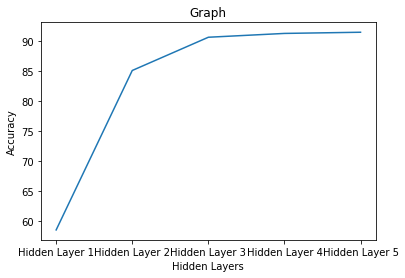

In [ ]:
Dict = {}
Dict['Hidden Layer 1'] = accuracy_r_h1
Dict['Hidden Layer 2'] = accuracy_r_h2
Dict['Hidden Layer 3'] = accuracy_r_h3
Dict['Hidden Layer 4'] = accuracy_r_h4
Dict['Hidden Layer 5'] = accuracy_r_h5
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Hidden Layers")
plt.ylabel("Accuracy")
plt.show()

##**f.** Add a provision to save and load weights in the MLP.

In [143]:
def addedSaveAndLoadWeightsTrainNetwork(network, neuron, training, testing, learning_rate, epochs, n_outputs, activation):
    loadWeights = []
    loss = []
    for epoch in range(epochs):
        error = 0
        for row in training:
            outputs = forwardPropagate(network, row, activation)
            for j in range(len(outputs)):
                if(outputs[j]==max(outputs)):
                    outputs[j] = 1
                else:
                    outputs[j] = 0
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])-1] = 1
            error += sum([(expected[k]-outputs[k])**2 for k in range(0, len(expected))])
            backwardPropagateTheError(network, expected, activation)
            updateweights(network, row, learning_rate)
        loadWeights.append(neuron['wts'])
        loss.append(error)
    pred = []
    for row in testing:
        outputs = forwardPropagate(network, row, activation)
        pred.append(outputs.index(max(outputs))+1)
    return loadWeights[loss.index(min(loss))], min(loss)/len(training), pred